# 1 Business Understanding 
### 1.1 Business Overview
The telecommunications industry is one of the most competitive sectors worldwide, where customer retention plays a critical role in profitability and long-term sustainability. While acquiring new customers is costly, retaining existing ones is significantly more profitable (Propello, 2024).Globally, churn rates in telecom average around 31% annually, with mobile churn around 20%, highlighting the magnitude of the challenge.

Within Syria, the mobile telecom market is dominated by two key players: Syriatel and MTN-Syria. Syriatel, founded in 2000, currently holds about 71% of the market share and reported 20% revenue growth in 2019, equivalent to SYP 221bn (~US$242m) . Despite its dominance, Syriatel faces challenges from economic sanctions, instability, and increasing customer expectations for service quality, pricing, and personalization.
(The Syria Report, 2020),For this reason, understanding what factors drive churn and how to reduce it is a key business priority.

Churn in this context refers to the proportion of customers who stop using Syriatel’s services, either by terminating contracts or switching to competitors. Understanding and reducing churn is crucial for Syriatel’s financial health and market leadership.
### 1.2 Problem Statement
Syriatel is experiencing customer churn that directly threatens its revenues and market position. While it has historically maintained a strong market share, rising competition, service quality issues, evolving customer demands, and broader political-economic instability increase the likelihood of customer attrition. Without effective churn prediction and retention strategies, Syriatel risks losing valuable customers, resulting in revenue loss, reduced market share, and diminished competitiveness.
### 1.3 Business Objective
#### 1.3.1 Main objective:
To develop a machine learning classifier that predicts whether a Syriatel customer is likely to churn, enabling data-driven strategies for proactive retention.
#### 1.3.2 Specific objectives:
1. To explore customer demographics and usage behaviour influencing churn.
2. To determine how charges influence customer churn
3. To develop and evaluate machine learning models that classify whether a customer is likely to churn.
4. optimize the models for best perfomance.
5. To provide actionable insights that support Syriatel in designing targeted retention campaigns (e.g., loyalty programs, personalized offers).
### 1.4 Research Questions
1. how does customer demographics and usage behaviour influence churn?
2. how charges influence customer churn?
3. what machine learning models best predict whether a customer is likely to churn.
4. Which optimization techniques and modeling approaches most effectively improve the predictive performance of machine learning model
5. How can predictive insights be applied to practical retention strategies to minimize churn?
### 1.5 Success Criteria
- Model Performance: Achieve at least 85% accuracy and a high AUC score (>0.85) in predicting churn.
- Business Impact: Provide insights that reduce churn rates by enabling proactive retention strategies, targeting high-risk customers before they leave.


# 2 Data Understanding
### 2.1 Data overview
The dataset is from kaggle with 3333 rows aand 21 columns

### Key Attributes
1. state: The state of the customer.
2. account length: The length of the account in days .
3. area code: The area code of the customer's phone number.
4. phone number: The phone number of the customer.
5. international plan: Whether the customer has an international plan or not.
6. voice mail plan: Whether the customer has a voicemail plan or not.
7. number vmail messages: The number of voicemail messages the customer has.
8. total day minutes: Total minutes of day calls.
9. total day calls: Total number of day calls.
10. total day charge: Total charge for the day calls.
11. total eve minutes: Total minutes of evening calls.
12. total eve calls: Total number of evening calls.
13. total eve charge: Total charge for the evening calls.
14. total night minutes: Total minutes of night calls.
15. total night calls: Total number of night calls.
16. total night charge: Total charge for the night calls.
17. total intl minutes: Total minutes of international calls.
18. total intl calls: Total number of international calls.
19. total intl charge: Total charge for the international calls.
20. customer service calls: Number of times the customer called customer service.
21. churn: Whether the customer churned or not (True/False).

### Data Quality
Missing values: none detected.
Duplicates:
Data types:Data types: Variables are a mix of categorical example : plans, churn and numerical examples: minutes, charges, calls.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [62]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [63]:
df.duplicated().sum()

0

In [64]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [66]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


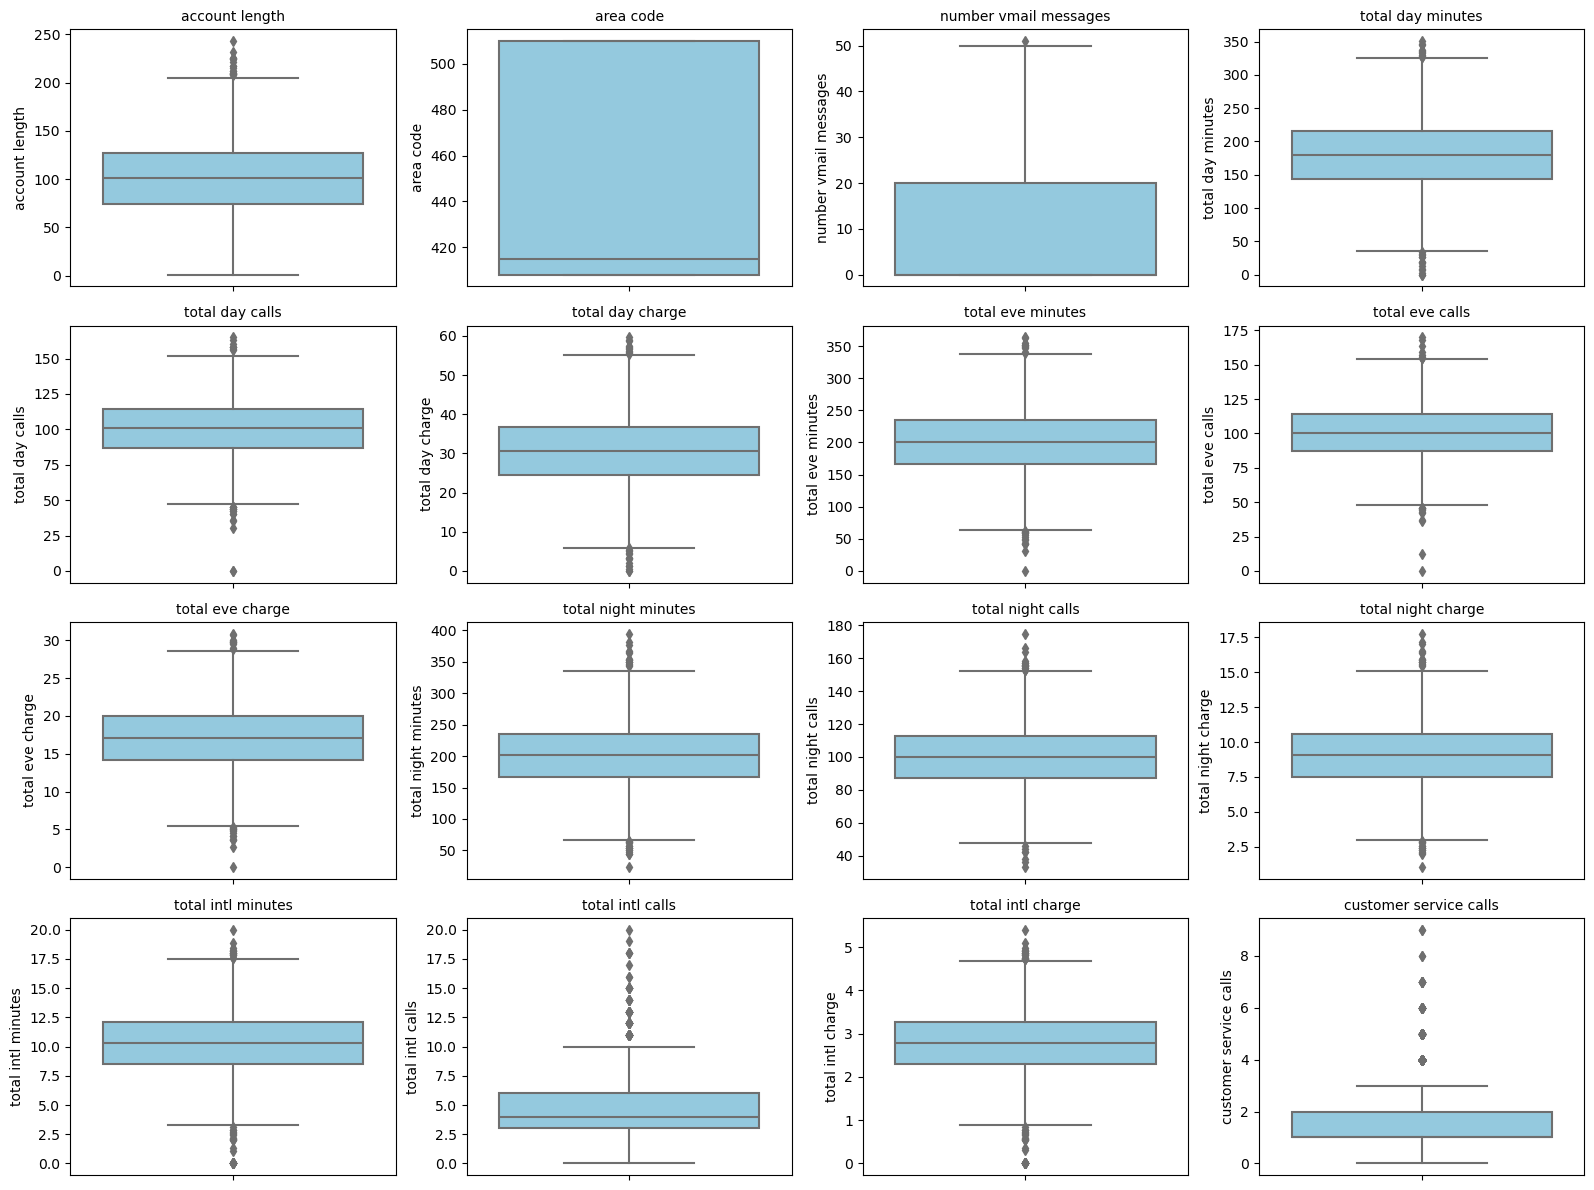

In [67]:

# check for outliers in all numeric columns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Set plotsize
plt.figure(figsize=(16, 12))

# loop through columns and plot subplots
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(4, 4, i)   # 4x4 grid since you have 16 numeric cols
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()




In [68]:


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate IQR for each column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Boolean DataFrame: True if value is an outlier
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Count of outliers per column
outliers.sum()


account length             18
area code                   0
number vmail messages       1
total day minutes          25
total day calls            23
total day charge           25
total eve minutes          24
total eve calls            20
total eve charge           24
total night minutes        30
total night calls          22
total night charge         30
total intl minutes         46
total intl calls           78
total intl charge          49
customer service calls    267
dtype: int64

we have outliers inn most of the columns 

In [69]:
df["churn"].mean()


0.14491449144914492

In [70]:
# percentage of customers who churned vs those who did not churn.
df["churn"].value_counts(normalize=True) * 100


churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

customers who stayed: is 85.50%
 while customers who churned is 14.49%

In [71]:
# Grouping the data by churn status 
# calculating the mean of the selected columns in order to compare the average values between customers who churn and those who do not.

group_stats = df.groupby("churn")[["customer service calls",
                                   "total day minutes",
                                   "total eve minutes",
                                   "total night minutes",
                                   "total intl calls"]].mean()
print(group_stats)


       customer service calls  total day minutes  total eve minutes  \
churn                                                                 
False                1.449825         175.175754         199.043298   
True                 2.229814         206.914079         212.410145   

       total night minutes  total intl calls  
churn                                         
False           200.133193          4.532982  
True            205.231677          4.163561  


In [72]:
corr = df.corr(numeric_only=True)["churn"].sort_values(ascending=False)
print(corr)


churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64
